In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
organes = pd.read_csv('out/organes.csv')
scrutins = pd.read_csv('out/scrutins.csv')
votes = pd.read_csv('out/votes.csv')

In [73]:
organes_pca = pd.read_csv('out/organes_pca.csv')
organes_pca

,libelle,axe 1,axe 2,@xmlns,@xmlns:xsi,@xsi:type,codeType,libelleEdition,libelleAbrege,libelleAbrev,...,regime,legislature,secretariat,listePays,regimeJuridique,siteInternet,nombreReunionsAnnuelles,positionPolitique,preseance,couleurAssociee
0,Écologiste - NUPES,-15.861192,-8.962629,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Écologiste - NUPES,Ecolo - NUPES,ECOLO,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,8.0,#77AA79
1,La France insoumise - Nouvelle Union Populaire...,-18.195686,-8.284161,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe La France insoumise - Nouvelle Union...,LFI - NUPES,LFI-NUPES,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,3.0,#E42313
2,Socialistes et apparentés (membre de l’intergr...,-11.725753,-5.530954,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Socialistes et apparentés (membre de...,SOC,SOC,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,6.0,#DF84B5
3,Gauche démocrate et républicaine - NUPES,-10.833742,-3.864243,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe de la Gauche démocrate et républicai...,GDR - NUPES,GDR-NUPES,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,9.0,#991414
4,Démocrate (MoDem et Indépendants),11.967708,-1.401537,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Démocrate (MoDem et Indépendants),Dem,DEM,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,5.0,#CE5215
5,Horizons et apparentés,11.211491,-1.290768,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Horizons et apparentés,HOR,HOR,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,7.0,#32B3CA
6,Renaissance,13.744716,-1.252989,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Renaissance,RE,RE,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Majoritaire,1.0,#61468F
7,"Libertés, Indépendants, Outre-mer et Territoires",-4.841635,-0.627983,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,"du groupe Libertés, Indépendants, Outre-mer et...",LIOT,LIOT,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,10.0,#F8D434
8,Non inscrit,-3.991444,1.488039,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,des députés non inscrits,NI,NI,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,NaN,99.0,#8D949A
9,Les Républicains,1.432160,4.147781,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Les Républicains,LR,LR,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,4.0,#4565AD


In [10]:
(
    scrutins
    .set_index('uid')
    .sort
    .value_counts()
)

rejeté    1025
adopté     507
Name: sort, dtype: int64

In [11]:
alignements = (
    votes
#    .query('organe.isin(@nupes.uid)')
    .groupby(['scrutin', 'organe'])
    .agg({
        'groupe_majorite': 'first'
    })
    .reset_index()
    .assign(
        organe = lambda df: df.join(organes.set_index('uid'), on='organe')[['libelle']]
    )
    .pivot_table(
        index="scrutin",
        columns="organe",
        values="groupe_majorite",
        aggfunc= 'first'
    )
)

alignements

organe,Démocrate (MoDem et Indépendants),Gauche démocrate et républicaine - NUPES,Horizons et apparentés,La France insoumise - Nouvelle Union Populaire écologique et sociale,Les Républicains,"Libertés, Indépendants, Outre-mer et Territoires",Non inscrit,Rassemblement National,Renaissance,Socialistes et apparentés (membre de l’intergroupe NUPES),Écologiste - NUPES
scrutin,,,,,,,,,,,
VTANR5L16V1,NaN,pour,NaN,pour,NaN,NaN,pour,NaN,NaN,pour,pour
VTANR5L16V10,contre,contre,contre,abstention,contre,contre,pour,pour,contre,contre,contre
VTANR5L16V100,contre,pour,contre,pour,contre,pour,contre,contre,contre,pour,pour
VTANR5L16V1000,contre,pour,contre,pour,contre,pour,contre,contre,contre,pour,pour
VTANR5L16V1001,contre,pour,contre,pour,contre,pour,contre,contre,contre,pour,pour
...,...,...,...,...,...,...,...,...,...,...,...
VTANR5L16V995,contre,pour,contre,pour,contre,pour,NaN,abstention,contre,pour,pour
VTANR5L16V996,contre,pour,contre,pour,contre,pour,pour,pour,contre,pour,pour
VTANR5L16V997,contre,pour,contre,pour,contre,pour,pour,pour,contre,pour,pour


In [89]:
performances = (
    alignements
    .T
    .fillna(0)
    .replace({
        'pour': 1,
        'contre': -1,
        'abstention': 0,
    })
    .mul(
        scrutins
        .set_index('uid')
        .sort
        .replace({
            'rejeté': -1,
            'adopté': 1
        })
    )
    .replace({
        0: 'pas joué',
        1: 'gagné',
        -1: 'perdu'
    })
    .reset_index()
    .set_index('organe')
    # .melt(id_vars='organe')
    # .pivot_table(
    #     index='organe',
    #     columns='value',
    #     values='variable',
    #     aggfunc='count'
    # )
    # .assign(
    #     total= lambda df: df.gagné+df.perdu
    # )
    # [['gagné', 'perdu', 'total', 'pas joué']]
    # .assign(
    #     performance= lambda df: df.gagné / df.total
    # )
    #.loc[organes_pca.libelle]
)

performances

,VTANR5L16V1,VTANR5L16V10,VTANR5L16V100,VTANR5L16V1000,VTANR5L16V1001,VTANR5L16V1002,VTANR5L16V1003,VTANR5L16V1004,VTANR5L16V1005,VTANR5L16V1006,...,VTANR5L16V990,VTANR5L16V991,VTANR5L16V992,VTANR5L16V993,VTANR5L16V994,VTANR5L16V995,VTANR5L16V996,VTANR5L16V997,VTANR5L16V998,VTANR5L16V999
organe,,,,,,,,,,,,,,,,,,,,,
Démocrate (MoDem et Indépendants),pas joué,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,...,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné
Gauche démocrate et républicaine - NUPES,perdu,gagné,perdu,perdu,perdu,perdu,perdu,perdu,perdu,perdu,...,perdu,perdu,perdu,perdu,perdu,perdu,perdu,perdu,perdu,perdu
Horizons et apparentés,pas joué,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,...,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné
La France insoumise - Nouvelle Union Populaire écologique et sociale,perdu,pas joué,perdu,perdu,perdu,perdu,perdu,perdu,perdu,perdu,...,perdu,perdu,perdu,perdu,perdu,perdu,perdu,perdu,perdu,perdu
Les Républicains,pas joué,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,...,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné
"Libertés, Indépendants, Outre-mer et Territoires",pas joué,gagné,perdu,perdu,perdu,gagné,gagné,gagné,gagné,gagné,...,perdu,gagné,perdu,perdu,perdu,perdu,perdu,perdu,perdu,perdu
Non inscrit,perdu,perdu,gagné,gagné,gagné,gagné,gagné,gagné,perdu,perdu,...,pas joué,gagné,perdu,perdu,perdu,pas joué,perdu,perdu,pas joué,gagné
Rassemblement National,pas joué,perdu,gagné,gagné,gagné,gagné,gagné,pas joué,gagné,gagné,...,perdu,pas joué,pas joué,pas joué,pas joué,pas joué,perdu,perdu,perdu,gagné
Renaissance,pas joué,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,...,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné,gagné


In [93]:
performances.T.to_csv('out/groupes_resultats.csv')

In [99]:
performances_resume = (
    performances
    .reset_index()
    .melt(id_vars='organe')
    .pivot_table(
        index='organe',
        columns='value',
        values='variable',
        aggfunc='count'
    )
    .assign(
        total= lambda df: df.gagné+df.perdu
    )
    .assign(
        participation= lambda df: 1 - df['pas joué']/df.total
    )
    [['gagné', 'perdu', 'total', 'pas joué', 'participation']]
    .assign(
        performance= lambda df: df.gagné / df.total
    )
    .loc[organes_pca.libelle]
)

performances_resume

value,gagné,perdu,total,pas joué,participation,performance
organe,,,,,,
Écologiste - NUPES,597,752,1349,183,0.864344,0.442550
La France insoumise - Nouvelle Union Populaire écologique et sociale,492,796,1288,244,0.810559,0.381988
Socialistes et apparentés (membre de l’intergroupe NUPES),629,673,1302,230,0.823349,0.483103
Gauche démocrate et républicaine - NUPES,479,708,1187,345,0.709351,0.403538
Démocrate (MoDem et Indépendants),1359,139,1498,34,0.977303,0.907210
Horizons et apparentés,1321,127,1448,84,0.941989,0.912293
Renaissance,1372,132,1504,28,0.981383,0.912234
"Libertés, Indépendants, Outre-mer et Territoires",683,435,1118,414,0.629696,0.610912
Non inscrit,640,435,1075,457,0.574884,0.595349


In [101]:
performances_resume.to_csv('out/performances_resume.csv')

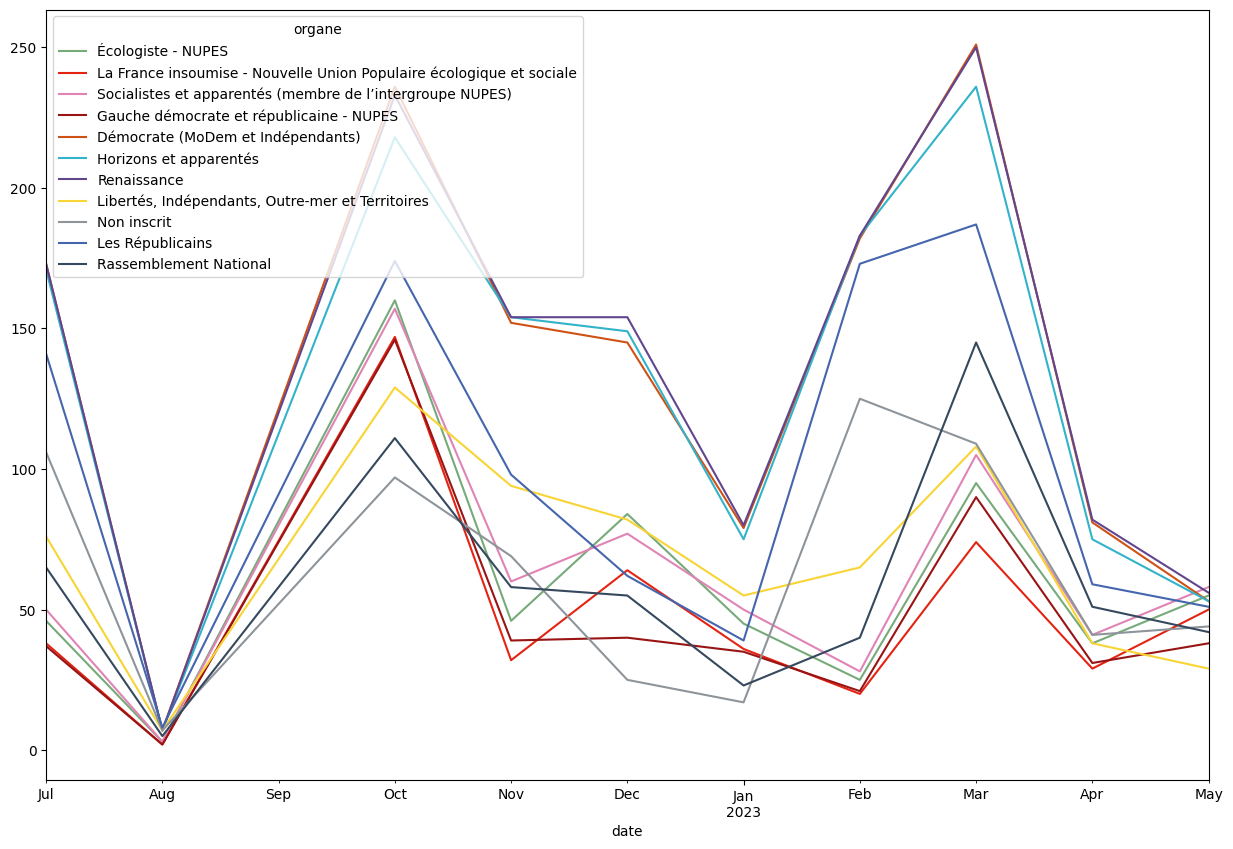

In [96]:
performances_m = (
    alignements
    .T
    .fillna(0)
    .replace({
        'pour': 1,
        'contre': -1,
        'abstention': 0,
    })
    .mul(
        scrutins
        .set_index('uid')
        .sort
        .replace({
            'rejeté': -1,
            'adopté': 1
        })
    )
    .replace({
        0: 'pas joué',
        1: 'gagné',
        -1: 'perdu'
    })
    .reset_index()
    .melt(id_vars='organe')
    .join(scrutins.set_index('uid')['date'], on='variable')
    .assign(date= lambda df: pd.to_datetime(df.date).dt.to_period('m'))
    .pivot_table(
        index=['date','organe'],
        columns='value',
        values='variable',
        aggfunc='count'
    )
    .assign(
        total= lambda df: df.gagné+df.perdu
    )
    .assign(
        performance= lambda df: df.gagné / df.total
    )
)


(
    performances_m
    [['gagné']]
    .reset_index()
    .pivot_table(
        index='date',
        columns='organe',
        values='gagné'
    )
    [organes_pca.libelle]
    .plot
    .line(
        figsize=(15,10),
        #ylim=[0,1],
        color=organes_pca.couleurAssociee,
        #stacked=True
    )
)

plt.savefig('graphics/performance_groupes.png')

In [103]:
performances_m.to_csv('out/performances_m.csv')